In [1]:
import numpy as np
import pandas as pd

import twint

# Fixes runtime errors with twint
import nest_asyncio
nest_asyncio.apply()

import matplotlib
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import string
import emoji

%load_ext autoreload

%autoreload

from functions import *

In [2]:
pd.set_option('max_colwidth', 150)

# Loading csvs

In [233]:
jan = pd.read_csv('Datasets/5k_jan_tweets.csv', index_col=0)
feb = pd.read_csv('Datasets/5k_feb_tweets.csv', index_col=0)
mar = pd.read_csv('Datasets/5k_mar_tweets.csv', index_col=0)
apr = pd.read_csv('Datasets/5k_apr_tweets.csv', index_col=0)
may = pd.read_csv('Datasets/5k_may_tweets.csv', index_col=0)
months = [jan, feb, mar, apr, may]

In [234]:
df = pd.concat(months)
df.shape

(575949, 17)

### Obtaining target variable

In [235]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [236]:
conditions = [
    df.sentiment_score > .05,
    df.sentiment_score < -.05
]

choices = [
    'positive',
    'negative'
]

df['sentiment'] = np.select(conditions, choices, 'neutral')

In [334]:
print(df.shape)

(575949, 20)


In [257]:
df.reset_index(drop=True, inplace=True)

In [295]:
df.head()

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to,sentiment_score,sentiment
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '843195118924546048', 'username': 'Best_of_MLTSHP'}]",-0.8176,negative
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1044738746913034241', 'username': 'lumora_lu'}]",-0.8905,negative
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,False,1.0,1.0,1.0,https://twitter.com/WBYeats1865/status/1212430526826479616,NaN,"[{'user_id': '963032516759207936', 'username': 'odiecher'}]",0.6705,positive
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2819219369', 'username': 'Hevysmoker'}, {'user_id': '1107018506300780544', 'username': 'cutedeadguys3'}]",-0.7783,negative
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '236195607', 'username': 'FaithR8s'}, {'user_id': '14745988', 'username': 'ThunderB'}, {'user_id': '14138785', 'username': 'Telegraph...",-0.2960,negative


In [8]:
df.to_csv('Datasets/5k_jan_thru_may_tweets.csv')

# Big Load!!!!!

In [3]:
df = pd.read_csv('Datasets/5k_jan_thru_may_tweets.csv', index_col=0)
df.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 19)

In [4]:
df['date'] = df.date.astype('datetime64[ns]')

In [5]:
df.shape

(575949, 19)

# EDA/Feature Engineering

In [6]:
df[df.nlikes > 10].groupby('sentiment')['tweet'].count()

sentiment
negative    18052
neutral      8223
positive    21355
Name: tweet, dtype: int64

In [7]:
df[df.nlikes > 0].groupby('sentiment')['tweet'].count()

sentiment
negative    105452
neutral      49210
positive    121327
Name: tweet, dtype: int64

In [8]:
df.groupby('sentiment')['tweet'].count()

sentiment
negative    221363
neutral     115386
positive    239200
Name: tweet, dtype: int64

In [9]:
df.date[0]

Timestamp('2020-01-01 00:00:00')

In [10]:
df['month'] = df.date.apply(lambda x: x.month)
df['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [11]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412361
       negative     0.409046
       neutral      0.178592
2      negative     0.421300
       positive     0.401849
       neutral      0.176851
3      positive     0.430622
       negative     0.387278
       neutral      0.182100
4      positive     0.405667
       negative     0.346007
       neutral      0.248327
5      positive     0.417187
       negative     0.393458
       neutral      0.189355
Name: sentiment, dtype: float64

In [12]:
df.sentiment_score.describe()

count    575949.000000
mean          0.017756
std           0.505938
min          -0.998400
25%          -0.381800
50%           0.000000
75%           0.440400
max           0.999600
Name: sentiment_score, dtype: float64

In [13]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412361
       negative     0.409046
       neutral      0.178592
2      negative     0.421300
       positive     0.401849
       neutral      0.176851
3      positive     0.430622
       negative     0.387278
       neutral      0.182100
4      positive     0.405667
       negative     0.346007
       neutral      0.248327
5      positive     0.417187
       negative     0.393458
       neutral      0.189355
Name: sentiment, dtype: float64

In [14]:
df.groupby('date').sentiment.value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


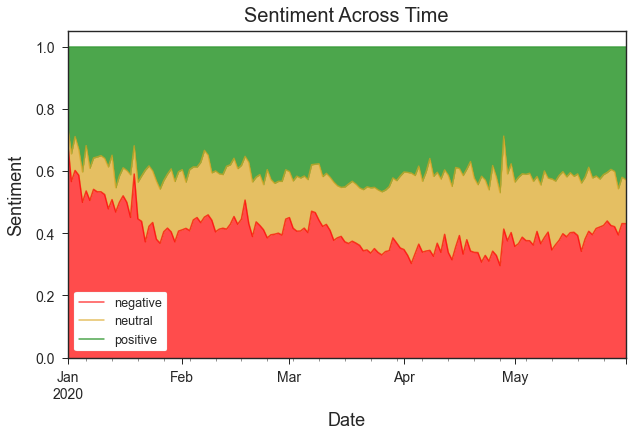

In [17]:
sns.set_style('ticks')

# sort by percentage of trees in good health
days = df.groupby('date').sentiment.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative','neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

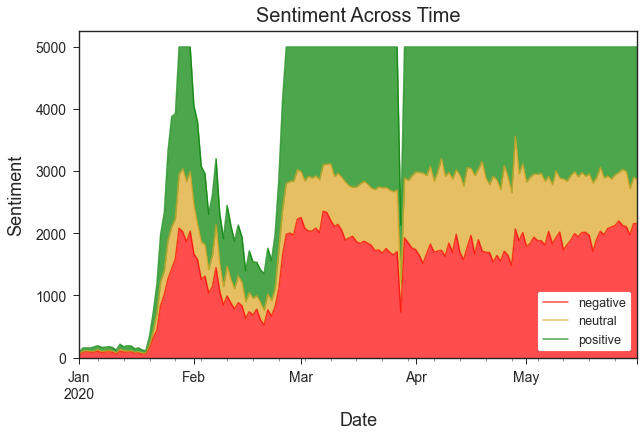

In [18]:
# sort by percentage of trees in good health
days = df.groupby('date').sentiment.value_counts().unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative','neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

# Cleaning text

In [19]:
stop_words = stopwords.words('english')
stop_words += ['mask', '#mask',
               'masks', '#masks',
               'face', '#face',
               'facemask', '#facemask',
               'facemasks', '#facemasks', 
               'covid', '#covid',
               'covid19', '#covid19',
               'corona', '#corona',
               'coronavirus', '#coronavirus',
               'rona', '#rona',
               'virus', '#virus',
               'viral', '#viral',
               'viruses', '#viruses']

In [67]:
# %time df['clean_tweet'] = df['tweet'].apply(lambda x: clean_text(x, stop_words))
# clean_tweets = df['clean_tweet']
# clean_tweets.head(10)

CPU times: user 6min 19s, sys: 2.16 s, total: 6min 21s
Wall time: 6min 24s


0                                                                                                                  death thomas unknown peasant died river
1                                                    ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck
2    know joke #ccpchina comes epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst us already dear fellow #hker...
3                                                                                                                            thought death gave horn freak
4                                                      interesting cult death wearing thinkingface electronically posing cia brennan chief facewithmonocle
5    see doctor stuff know war increased quality medical care hospitals start admitting patients even chemical attack doctor rushes spot gives intervie...
6                                                                     

In [70]:
# clean_tweets.to_pickle('Datasets/clean_tweets.pkl')

In [20]:
clean_tweets = pd.read_pickle('Datasets/clean_tweets.pkl')

In [21]:
pattern = "(#?[a-zA-Z]+[0-9]*(?:'[a-zx]+)?)"
tokenizer = RegexpTokenizer(pattern)

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=5, token_pattern=pattern)
data_cv = cv.fit_transform(clean_tweets)
data_vec = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_vec.head()

In [ ]:
data_vec.shape

In [ ]:
# Let's pickle it for later use
data_vec.to_pickle("Datasets/vec.pkl")

In [ ]:
data_vec = pd.read_pickle("Datasets/vec.pkl")

In [ ]:
data_vec.sum()

In [8]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in test.columns:
    top = test[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

KeyboardInterrupt: 

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in test.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

In [256]:
df['date'][0]

0    2020-01-01
0    2020-02-01
0    2020-03-01
0    2020-04-01
Name: date, dtype: object

In [221]:
may[['nlikes','nreplies','nretweets']].describe()

,nlikes,nreplies,nretweets
count,155000.000000,155000.000000,155000.000000
mean,14.591948,1.282916,4.496426
std,1108.467257,33.923692,338.266606
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000
max,349204.000000,7955.000000,121056.000000


In [126]:
pos = TextBlob(tweets[2])
print(pos.tags)

[('Using', 'VBG'), ('the', 'DT'), ('coverage', 'NN'), ('of', 'IN'), ('his', 'PRP$'), ('yellow', 'JJ'), ('card', 'NN'), ('to', 'TO'), ('mask', 'VB'), ('the', 'DT'), ('fact', 'NN'), ('his', 'PRP$'), ('team', 'NN'), ('lost', 'VBD'), ('to', 'TO'), ('Southampton', 'NNP'), ('ClassicJose', 'NNP'), ('CoverUp', 'NNP')]


In [122]:
for tag in pos.tags:
    if 'mask' in tag[0]:
        print(tag)

('masks', 'NNS')


In [115]:
for tweet in tweets[5:10]:
    pos = TextBlob(tweet)
    print(pos.tags)

[('.My', 'NN'), ('daughter', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('sick', 'VBN'), ('with', 'IN'), ('a', 'DT'), ('nasty', 'JJ'), ('cough', 'NN'), ('for', 'IN'), ('weeks', 'NNS'), ('She', 'PRP'), ('ignores', 'VBZ'), ('my', 'PRP$'), ('advice', 'NN'), ('about', 'IN'), ('wearing', 'VBG'), ('a', 'DT'), ('mask', 'NN'), ('Can', 'NNP'), ('any', 'DT'), ('Drs', 'NNP'), ('out', 'IN'), ('there', 'RB'), ('please', 'VB'), ('tweet', 'NN'), ('about', 'IN'), ('the', 'DT'), ('health', 'NN'), ('impacts', 'NNS'), ('of', 'IN'), ('breathing', 'VBG'), ('this', 'DT'), ('toxic', 'NN'), ('air', 'NN'), ('even', 'RB'), ('when', 'WRB'), ('it', 'PRP'), ("'s", 'VBZ'), ('not', 'RB'), ('smelling', 'JJ'), ('strongly', 'RB'), ('of', 'IN'), ('smoke', 'NN'), ('so', 'IN'), ('that', 'IN'), ('I', 'PRP'), ('can', 'MD'), ('show', 'VB'), ('her', 'PRP$'), ('I', 'PRP'), ('am', 'VBP'), ('not', 'RB'), ('full', 'JJ'), ('of', 'IN'), ('shit', 'NN')]
[('😺✏', 'NN'), ('—', 'NNP'), ('Aside', 'NNP'), ('from', 'IN'), ('butt', 'NN'), ('ma

In [128]:
masks.shape

(6480, 10)

In [130]:
masks['pos'] = masks['tweet'].apply(mask_pos_finder)
masks.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,username,tweet,hashtags,nlikes,nreplies,retweet,nretweets,polarity,subjectivity,pos
0,2020-01-01 18:59:56,Matt04181,SpongeBob: slides down Sand Mountain\nThe tree...,[],4,0,False,0,-0.155556,0.288889,NN
1,2020-01-01 18:59:55,standtallx,"Started 2020 with freshly washed bed sheets, a...",[],3,2,False,0,0.012500,0.425000,NN
2,2020-01-01 18:59:43,5_Times_LFC,Using the coverage of his yellow card to mask ...,"[#classicjose, #coverup]",0,0,False,0,0.000000,0.000000,VB
3,2020-01-01 18:59:37,kagura_shelby,The mask pic.twitter.com/vHi9pC9S62,[],3,0,False,0,0.000000,0.000000,NN
4,2020-01-01 18:59:24,IBdaSweet1,"I know what you mean, I've been depressed too ...",[#hugs],1,0,False,0,0.271591,0.648409,VB


In [133]:
masks.pos.value_counts(normalize=True)

NN     0.541166
NNS    0.384220
JJ     0.027616
VB     0.022642
VBZ    0.007547
VBP    0.004974
VBN    0.003602
VBD    0.002916
NNP    0.001715
SYM    0.000858
VBG    0.000686
FW     0.000686
RB     0.000515
PRP    0.000343
IN     0.000343
JJR    0.000172
Name: pos, dtype: float64

In [231]:
for tweet in masks[masks.pos == 'VBD']['tweet']:
    print(tweet)

1. Get a wrist brace for the carpal tunnel
2. Take a pill for the prostate
3. Get breathe rite strips
4. Get wife apnea mask
5. Take cover until november than vote the orange man out.
Lil bruh said fuck it mask off
Mask on? Fuck it mask off!  https://twitter.com/youLoveBk_/status/1216918239202152449 …
Boi said fuck it mask off 😂  https://twitter.com/youLoveBk_/status/1216918239202152449 …
"fuck it, mask off"
Woah...mask off Bear...  pic.twitter.com/XaSsj9UbZT
1) The photo of the three masked man on the train. It's supposed to be a carnival mask, not a containing mask. 
2) There are no cases reporter on Friuli-Venezia Giulia. I know because I'm from Friuli.

Don't spread fake news, thanks. 
People is already scared...
Pop smoke dior
Drake war
Futur mask off
fuck it mask off
Fuck it mask off
They really just said "fuck it mask off"
Only fck wit rich niggas fck it mask off
Mask on 😷😷
Fuck it mask off 😶😶 type shit
Never gonna stop, give it up, such dirty hands
I always mask it up, for the 

In [288]:
masks['clean_tweet'] = masks['tweet'].apply(lambda x: clean_text(x))
masks_cleaned = masks['clean_tweet']
masks_cleaned.head(10)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      spongebob slides sand mountain tree oxygen mask
1    started freshly washed bed sheets face mask be...
2    using coverage yellow card mask fact team lost...
3                                                 mask
4    know mean depressed mask pain let others happy...
5    daughter sick nasty cough weeks ignores advice...
6    grinningcatface pencil aside butt masks yes ex...
7    energy something else post pics generic lookin...
8                      kind mask much one different us
9    market moved given detox scalp mask since prom...
Name: clean_tweet, dtype: object

In [290]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(masks_cleaned)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.head()

,a1,a7,a8,aa,aaaaaaand,aaaandhe,aaah,aama,aap,aarons,...,zoro,zorro,zosakonc,zpacks,zsasz,zthickness,zuckerberg,zuko,zurich,zvanetsa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
from gensim import matutils, models
import scipy.sparse

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [294]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.053*"masks" + 0.019*"people" + 0.019*"mask" + 0.015*"wear" + 0.011*"wearing" + 0.006*"face" + 0.006*"virus" + 0.006*"need" + 0.006*"please" + 0.006*"social"'),
 (1,
  '0.053*"mask" + 0.027*"wear" + 0.019*"masks" + 0.015*"face" + 0.007*"hands" + 0.006*"stay" + 0.006*"gas" + 0.006*"safe" + 0.005*"take" + 0.004*"people"'),
 (2,
  '0.036*"mask" + 0.017*"masks" + 0.012*"covid" + 0.006*"face" + 0.005*"distance" + 0.004*"president" + 0.003*"citizens" + 0.003*"covid19" + 0.003*"via" + 0.002*"trump"'),
 (3,
  '0.033*"masks" + 0.024*"mask" + 0.012*"facewithtearsofjoy" + 0.012*"wearing" + 0.011*"like" + 0.008*"get" + 0.006*"face" + 0.006*"one" + 0.005*"even" + 0.004*"shit"'),
 (4,
  '0.073*"mask" + 0.017*"wearing" + 0.014*"face" + 0.011*"like" + 0.009*"one" + 0.007*"see" + 0.006*"people" + 0.005*"time" + 0.005*"black" + 0.005*"would"')]

In [32]:
test_5k

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to
4,1256720837660545024,1256715090545512449,1588460571000,2020-05-02,Coronavirus-Did the US just supply a million f...,[],263966773,modernactivism,Modern Activism,https://twitter.com/modernactivism/status/1256...,False,0,0,0,NaN,NaN,"[{'user_id': '263966773', 'username': 'moderna..."
22,1256372751314685953,1256015002651299847,1588377580000,2020-05-01,Absolutely. Most successful countries address ...,"['#coronavirus', '#covid__19', '#masks']",839786785,RealRandyCohen,ARJAY,https://twitter.com/RealRandyCohen/status/1256...,False,0,0,0,NaN,NaN,"[{'user_id': '839786785', 'username': 'RealRan..."
23,1256372749720645632,1256372749720645632,1588377580000,2020-05-01,Bhubaneswar: Transgenders sew and distribute m...,[],1210423564052004865,RSRINIVASABABU1,R SRINIVASA BABU,https://twitter.com/RSRINIVASABABU1/status/125...,False,0,0,0,NaN,NaN,"[{'user_id': '1210423564052004865', 'username'..."
24,1256372718452248576,1256372718452248576,1588377573000,2020-05-01,Mask 😷 Hack! #COVID__19 #mask #WearAMask #hack...,"['#covid__19', '#mask', '#wearamask', '#hack',...",39323281,themamamaven,Nancy Johnson Horn,https://twitter.com/themamamaven/status/125637...,False,10,1,9,NaN,NaN,"[{'user_id': '39323281', 'username': 'themamam..."
26,1256372709660884992,1256351905095221248,1588377570000,2020-05-01,I only sneak out every 4 days or so for grocer...,[],2284107283,NolandTt,Tom Noland,https://twitter.com/NolandTt/status/1256372709...,False,1,0,0,NaN,NaN,"[{'user_id': '2284107283', 'username': 'Noland..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,1257684042209800193,1257684042209800193,1588690216000,2020-05-05,"""Clutches have been awesome during #coronaviru...",['#coronavirus'],43413162,ThirstiesInc,Thirsties Inc,https://twitter.com/ThirstiesInc/status/125768...,False,1,0,0,NaN,NaN,"[{'user_id': '43413162', 'username': 'Thirstie..."
50379,1257683998983282689,1257683998983282689,1588690206000,2020-05-05,As President Trump attempts to project an imag...,[],14915067,witfnews,WITF news,https://twitter.com/witfnews/status/1257683998...,False,0,0,0,NaN,NaN,"[{'user_id': '14915067', 'username': 'witfnews'}]"
50381,1257683985439821825,1257683985439821825,1588690203000,2020-05-05,"Coronavirus, face masks and America's new faul...","['#covid19', '#onevoice1', '#voteblue2020', '#...",218949823,Hellacort,David Hilycord,https://twitter.com/Hellacort/status/125768398...,False,11,1,8,NaN,NaN,"[{'user_id': '218949823', 'username': 'Hellaco..."
50382,1257683964254466049,1257683964254466049,1588690198000,2020-05-05,I’ve been saying this for weeks. Corona is in ...,[],146037421,briandordevic,Brian Dordevic 📲📷📈,https://twitter.com/briandordevic/status/12576...,False,2,1,1,https://twitter.com/arabbitorduck/status/12576...,NaN,"[{'user_id': '146037421', 'username': 'briando..."


In [11]:
test.groupby('date').tweet.str.contains('corona').value_counts()

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [22]:
for tweet in test.tweet[50:100]:
    print(tweet)

This corona shit really got niggas walking up too you like “excuse you got a extra mask they not letting me in the store” 😭😭😭😭😭😭😭😭😭😭😭
Face masks are going to be accessories .. like earrings and scarves.... and the luxury brands are going to cash in on it ! #fashionwins #luxurybrands #covid19  https://www.cnn.com/2020/04/14/business/louis-vuitton-face-masks/index.html …
my news feeds are invaded with ads for fancy masks with valves... that defeat the purpose of wearing a mask during a epidemic 🤯#maskup #COVID__19 https://www.fastcompany.com/90496717/what-is-a-mask-valve-and-why-are-cities-banning-them …
It’s staggering the amount of people outside without masks and not distancing in Toronto. This is how not to beat #COVID. I know it’s nice out, but you’ll be trapped inside a lot longer if you don’t follow simple rules.
Worried your cloth mask isn’t filtering coronavirus? This simple hack could make it more effective  https://www.fastcompany.com/90498270/worried-your-cloth-mask-isnt-filt

In [45]:
masks = pd.read_csv('Datasets/5k_jan_tweets.csv',index_col=0)
masks.head()

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the deat...",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212...,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '843195118924546048', 'username':..."
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment a...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/121251804...,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1044738746913034241', 'username'..."
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,We all know what a joke #CCPChina is when it c...,"['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557...,False,1.0,1.0,1.0,https://twitter.com/WBYeats1865/status/1212430...,NaN,"[{'user_id': '963032516759207936', 'username':..."
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/12125155...,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2819219369', 'username': 'Hevysm..."
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔...",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409...,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '236195607', 'username': 'FaithR8..."


In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

masks['sentiment_score'] = masks['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [58]:
masks.sentiment[0]

-0.8176

In [56]:
masks.sentiment[0]['compound']

-0.8176

In [59]:
masks.sentiment.mean()

-0.000757438644754942

In [61]:
conditions = [
    masks.sentiment_score > .05,
    masks.sentiment_score < -.05
]

choices = [
    'positive',
    'negative'
]

masks['sentiment'] = np.select(conditions, choices, 'neutral')

In [63]:
masks.sentiment.value_counts()

negative    17100
positive    16882
neutral      7457
Name: sentiment, dtype: int64

In [64]:
masks2 = pd.read_csv('Datasets/5k_feb_tweets.csv', index_col=0)
masks2.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to
0,1.223758e+18,1.223758e+18,1.580602e+12,2020-02-01,"Bought Bruno Fernandes, play him at CDM? Wtf a...",[],2.221553e+09,chong_wh96,Chong_wH,https://twitter.com/chong_wh96/status/12237578...,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2221552537', 'username': 'chong_..."
1,1.223758e+18,1.223758e+18,1.580602e+12,2020-02-01,My sister sent me $90 worth of face masks and ...,[],3.075768e+09,Yamanik30,ACAB,https://twitter.com/Yamanik30/status/122375787...,False,6.0,0.0,0.0,NaN,NaN,"[{'user_id': '3075767827', 'username': 'Yamani..."
2,1.223758e+18,1.223758e+18,1.580602e+12,2020-02-01,When you were a mask to stop the cronavirus bu...,[],1.209989e+18,Harry31348302,Harry,https://twitter.com/Harry31348302/status/12237...,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1209988745790918656', 'username'..."
3,1.223758e+18,1.223758e+18,1.580602e+12,2020-02-01,"this girl is deadass bragging about ""wearing m...",[],3.156025e+09,JaceLucena,katka,https://twitter.com/JaceLucena/status/12237577...,False,9.0,0.0,1.0,NaN,NaN,"[{'user_id': '3156025472', 'username': 'JaceLu..."
4,1.223758e+18,1.223758e+18,1.580602e+12,2020-02-01,Sister is determined to infect me. Emerged fro...,[],1.583843e+07,nyman11209,Hobonator,https://twitter.com/nyman11209/status/12237577...,False,1.0,0.0,0.0,NaN,NaN,"[{'user_id': '15838427', 'username': 'nyman112..."


In [70]:
masks2['sentiment_score'] = masks2['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

conditions = [
    masks2.sentiment_score > .05,
    masks2.sentiment_score < -.05
]

choices = [
    'positive',
    'negative'
]

masks2['sentiment'] = np.select(conditions, choices, 'neutral')

In [71]:
masks2.sentiment.value_counts()

negative    38152
positive    31819
neutral     14237
Name: sentiment, dtype: int64

In [72]:
masks2.sentiment_score.mean()

-0.03440293915067452

In [73]:
masks3 = pd.read_csv('Datasets/5k_mar_1_16_tweets.csv', index_col=0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
masks3['sentiment_score'] = masks3['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

conditions = [
    masks3.sentiment_score > .05,
    masks3.sentiment_score < -.05
]

choices = [
    'positive',
    'negative'
]

masks3['sentiment'] = np.select(conditions, choices, 'neutral')

In [77]:
masks3.sentiment.value_counts()

negative    34682
positive    32128
neutral     13190
Name: sentiment, dtype: int64

In [78]:
masks3.sentiment_score.mean()

-0.013039305000000001

In [201]:
masks3['cleaned_tweet'] = masks3['tweet'].apply(lambda x: clean_text(x, stop_words))

In [206]:
for i, tweet in enumerate(masks3['tweet'].head(50)):
    print(i, tweet)
    print('\n-----------------------------\n')

0 The new police issue masks might not prevent covid19 identifying them as human.

-----------------------------

1 Those *who are with the virus* should wear a mask if they need to go outside. Those "*who are not* don't benefit at all from using them, they benefit much more by having basic hygiene manners.

-----------------------------

2 … I guess Nancy can put in masks for everyone in her coronavirus funding

-----------------------------

3 Washing your hands and disinfecting your electronics will save you more than masks  https://twitter.com/Pog_llins/status/1233869731607826433 …

-----------------------------

4 Americans worried about coronavirus don't need to buy face masks, US surgeon general says

 http://fox10phoenix.com/news/americans-worried-about-coronavirus-dont-need-to-buy-face-masks-us-surgeon-general-says …

-----------------------------

5 all these people out here worried about the coronavirus so they start wearing the masks and guess where the masks are made? In c

In [207]:
for i, tweet in enumerate(masks3['cleaned_tweet'].head(50)):
    print(i, tweet)
    print('\n-----------------------------\n')

0 new police issue might prevent identifying human

-----------------------------

1 wear need go outside benefit using benefit much basic hygiene manners

-----------------------------

2 guess nancy put everyone funding

-----------------------------

3 washing hands disinfecting electronics save

-----------------------------

4 americans worried need buy us surgeon general says

-----------------------------

5 people worried start wearing guess made china facewithtearsofjoy

-----------------------------

6 get toilet paper sanitizer paper towels tissues vodka next people waiting line hours stores open buy stuff going try luck costco today #japan #coronavirusupdate

-----------------------------

7 webinar discuss research related long term respirator usage outbreaks infectious diseases including guidance surgical overlay recommended learn register #emgtwitter

-----------------------------

8 went sams today hand sanitizer barely lysol wipes spray walgreens cvs sold anti woozyfac

In [113]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(masks3['cleaned_tweet'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.head()

,a0,a1,a10,a2,a3,a4,a5,a9,aa,aa377,...,zulus,zum,zuma,zumba,zurich,zville,zweli,zyad,zyada,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
from gensim import matutils, models
import scipy.sparse

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [115]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.018*"hand" + 0.013*"sanitizer" + 0.012*"people" + 0.008*"get" + 0.008*"wear" + 0.008*"like" + 0.007*"gloves" + 0.007*"facewithmedicalmask" + 0.007*"paper" + 0.006*"got"'),
 (1,
  '0.015*"hospital" + 0.012*"health" + 0.011*"staff" + 0.010*"patients" + 0.010*"care" + 0.010*"nurse" + 0.006*"new" + 0.006*"workers" + 0.006*"hospitals" + 0.006*"medical"'),
 (2,
  '0.023*"us" + 0.022*"doctors" + 0.022*"gloves" + 0.020*"nurses" + 0.019*"china" + 0.018*"kits" + 0.016*"without" + 0.015*"test" + 0.013*"risk" + 0.011*"million"'),
 (3,
  '0.028*"facewithtearsofjoy" + 0.023*"wearing" + 0.021*"gas" + 0.013*"man" + 0.013*"one" + 0.011*"wore" + 0.009*"house" + 0.009*"rollingonthefloorlaughing" + 0.007*"via" + 0.006*"gaetz"'),
 (4,
  '0.026*"people" + 0.021*"wear" + 0.020*"wearing" + 0.012*"infected" + 0.012*"need" + 0.011*"protect" + 0.010*"get" + 0.009*"hands" + 0.008*"like" + 0.008*"sick"')]

In [62]:
masks['polarity'] = masks['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
masks['subjectivity'] = masks['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
masks.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,username,tweet,hashtags,nlikes,nreplies,retweet,nretweets,polarity,subjectivity
0,2020-01-01 18:59:56,Matt04181,SpongeBob: slides down Sand Mountain\nThe tree...,[],4,0,False,0,-0.155556,0.288889
1,2020-01-01 18:59:55,standtallx,"Started 2020 with freshly washed bed sheets, a...",[],3,2,False,0,0.012500,0.425000
2,2020-01-01 18:59:43,5_Times_LFC,Using the coverage of his yellow card to mask ...,"[#classicjose, #coverup]",0,0,False,0,0.000000,0.000000
3,2020-01-01 18:59:37,kagura_shelby,The mask pic.twitter.com/vHi9pC9S62,[],3,0,False,0,0.000000,0.000000
4,2020-01-01 18:59:24,IBdaSweet1,"I know what you mean, I've been depressed too ...",[#hugs],1,0,False,0,0.271591,0.648409


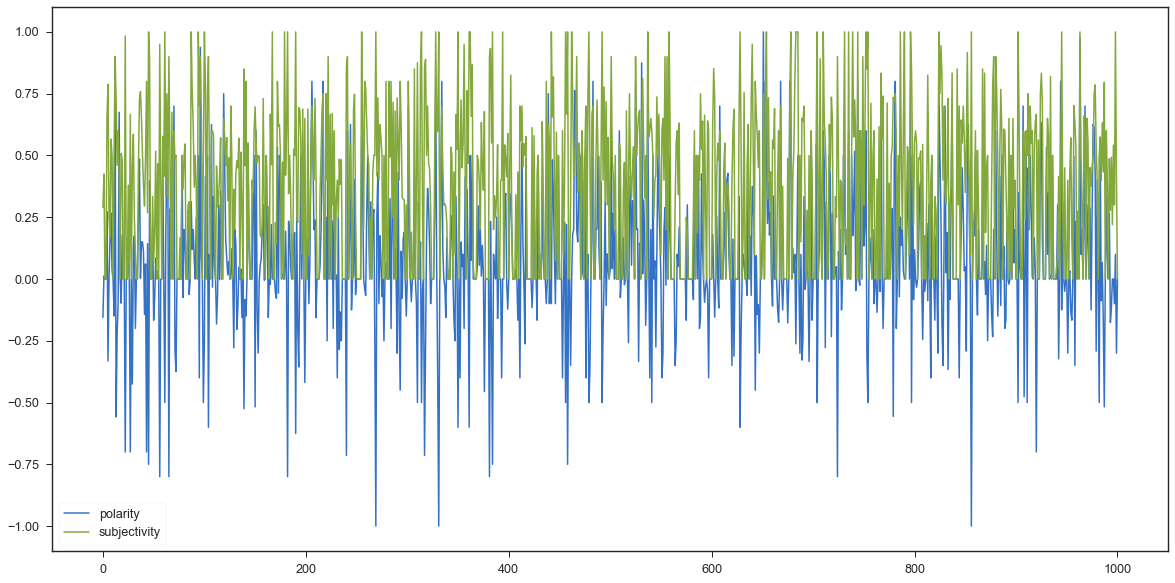

In [69]:
sns.set_style('ticks')

masks.loc[:1000,['polarity', 'subjectivity']].plot(figsize=(20,10))

In [94]:
masks_ts = masks[['date', 'polarity', 'subjectivity']]
masks_ts['date'] = masks_ts['date'].astype('datetime64[ns]')
masks_ts.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,polarity,subjectivity
0,2020-01-01 18:59:56,-0.155556,0.288889
1,2020-01-01 18:59:55,0.012500,0.425000
2,2020-01-01 18:59:43,0.000000,0.000000
3,2020-01-01 18:59:37,0.000000,0.000000
4,2020-01-01 18:59:24,0.271591,0.648409


In [95]:
masks_ts.set_index('date', inplace=True)
masks_ts.index

DatetimeIndex(['2020-01-01 18:59:56', '2020-01-01 18:59:55',
               '2020-01-01 18:59:43', '2020-01-01 18:59:37',
               '2020-01-01 18:59:24', '2020-01-01 18:59:20',
               '2020-01-01 18:59:20', '2020-01-01 18:59:16',
               '2020-01-01 18:59:09', '2020-01-01 18:58:57',
               ...
               '2020-06-10 19:59:45', '2020-06-10 19:59:44',
               '2020-06-10 19:59:44', '2020-06-10 19:59:43',
               '2020-06-10 19:59:43', '2020-06-10 19:59:41',
               '2020-06-10 19:59:41', '2020-06-10 19:59:41',
               '2020-06-10 19:59:41', '2020-06-10 19:59:40'],
              dtype='datetime64[ns]', name='date', length=6480, freq=None)

In [96]:
masks_ts_daily = masks_ts.resample('D').mean()
masks_ts_daily.head()

,polarity,subjectivity
date,,
2020-01-01,0.004358,0.369293
2020-01-02,-0.001089,0.379444
2020-01-03,0.111727,0.440448
2020-01-04,0.040365,0.383991
2020-01-05,0.047351,0.418947


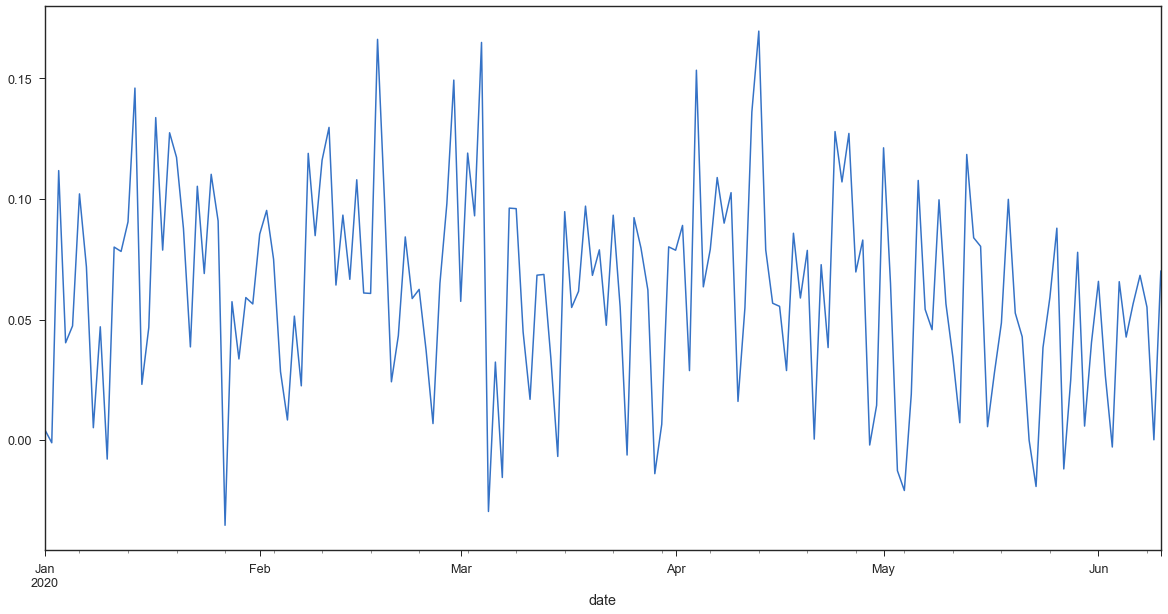

In [97]:
masks_ts_daily['polarity'].plot(figsize=(20,10))

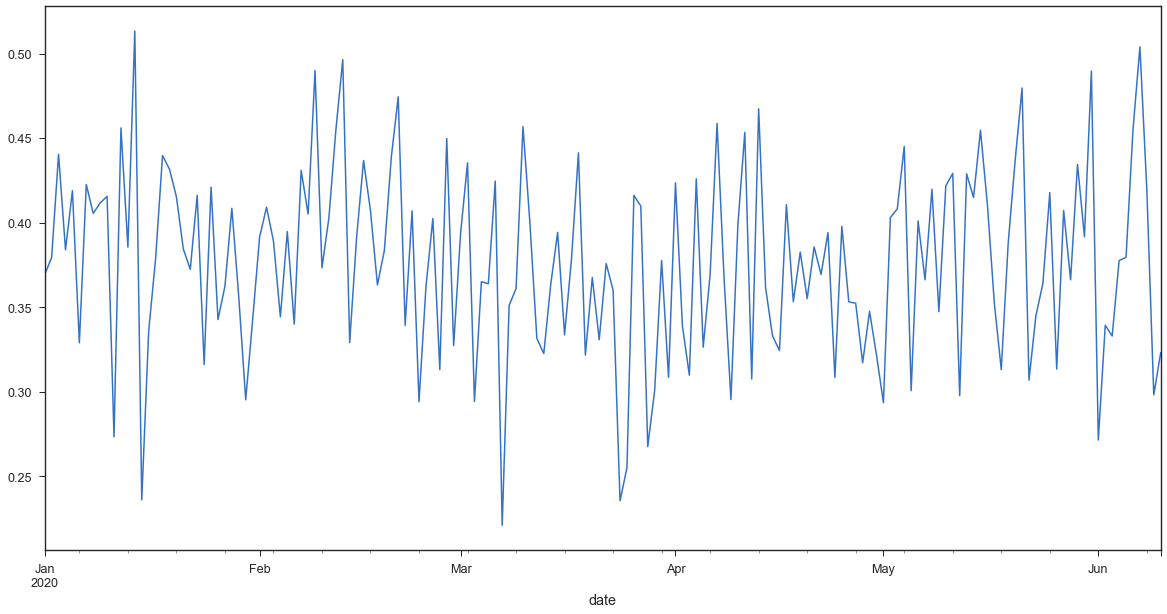

In [98]:
masks_ts_daily['subjectivity'].plot(figsize=(20,10))

In [28]:
import datetime

dates = []
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 6, 11)
delta = datetime.timedelta(days=1)

while start_date <= end_date:
    dates.append(str(start_date))
    start_date += delta